## Classification -Manual example-

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-01-01

Here, I present a simple and easy way to create a graph with its own session to solve a simple classification problem.

This is an extention of "Graph and session example" presented previously.

# The General Operation

The operation is a a node in a "Graph".

The Operation class is inherited by other classes that compute the specific operations, such as adding or matrix multiplication.

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class TheOperation():
    
    #Here, we initilize any operation
    def __init__(self, Nodes_Input = []):
        
        self.Nodes_Input = Nodes_Input #This is the list of inputs
        self.Nodes_Ouput = [] # This is the list of empty outputs
        
        for Nodes in Nodes_Input:
            Nodes.Nodes_Ouput.append(self) #for inputs nodes, we append the operation
    
        _main_graph.Operation.append(self)
    
    def computing(self):
        pass #provisional placeholder, the actual operation will be inherit here.

# Operations

Here, all the operations will be defined as a class

# Add +

In [3]:
class add(TheOperation):
    
    def __init__(self, a,b):
        super().__init__([a,b]) #we assign the inputs of the operation
        
    def computing(self, a,b): #this is the actual operation
        self.Inputs = [a,b]
        return a + b

We can re-use the same code to create the rest of the operations

# Multiplication *

In [4]:
class multiply(TheOperation):
    
    def __init__(self, a,b):
        super().__init__([a,b]) #we assign the inputs of the operation
        
    def computing(self, a,b): #this is the actual operation
        self.Inputs = [a,b]
        return a * b

# Multiplication (Matrix) .*

In [5]:
class multiplyM(TheOperation):
    
    def __init__(self, a,b):
        super().__init__([a,b]) #we assign the inputs of the operation
        
    def computing(self, a,b): #this is the actual operation
        self.Inputs = [a,b]
        return a.dot(b)

# The placeholders

The placeholder is a empty node that will need a value for compute the outputs in the Graph.


In [6]:
class Theplaceholder():
    
    def __init__(self):
        self.Nodes_Ouput = [] #at the beginning it is an empty list
        _main_graph.Placeholders.append(self) #use a global variable to access to the graph

# The Variables

Here, all variables are defined as a changeable value of the Graph.

In [7]:
class TheVariable():
    
    def __init__(self, value_initial = None): #the variable is initialize as empty
        self.value = value_initial
        self.Nodes_Ouput = []
        _main_graph.Variables.append(self) #use a global variable to access to the graph

# Order the operations, variables and placeholders

This function creates a list of all operations, variables and placeholders in correct order to the be computed.

In [8]:
def Order_operation(operation):
    
    Ordered_nodes = []
    
    def order(Operation_nodes):
        if isinstance(Operation_nodes, TheOperation): #If the node is part of an operation
            for Nodes_input in Operation_nodes.Nodes_Input:
                order(Nodes_input)
        Ordered_nodes.append(Operation_nodes)
    
    order(operation)
    return Ordered_nodes

# The Graph

Here is wehre the Graph is defined, to then perform computations in a session.

In [9]:
class TheGraph():
    
    def __init__(self):
        
        self.Operation = []
        self.Variables = []
        self.Placeholders = []
    
    def Default(self):
        
        global _main_graph #definition of global variable
        _main_graph = self

# The session

In [10]:
class TheSession():
    
    def run(self, operation, Placeholder_dict = {}): #Placeholder_dict is the dictionary defining the placeholders
        
        #Create the list of operations, variables and placeholders
        
        Ordered_nodes = Order_operation(operation)
        
        for Nodes in Ordered_nodes:
            if type(Nodes) == TheVariable:
                Nodes.output = Nodes.value #the variables values  
            elif type(Nodes) == Theplaceholder:
                Nodes.output = Placeholder_dict[Nodes] #feed values to placeholders
            else: #perform the operations
                Nodes.inputs = [Nodes_Input.output for Nodes_Input in Nodes.Nodes_Input]
                Nodes.output = Nodes.computing(*Nodes.inputs) #The * means that we do not know the number of parameters
            if type(Nodes.output) == list:
                Nodes.output = np.array(Nodes.output) #Convert to np array
                
        return operation.output

# Activation function

Before continue with the classification problem, it is necessary to define an activation function.

## Sigmoid activation

In [11]:
class Sigmoid_Activation(TheOperation):
    
    def __init__(self, z):
        super().__init__([z]) #we assign the inputs of the operation
        
    def computing(self, z): #this is the actual operation
        
        return 1/(1+np.exp(-z))

# Classification Example

## Create data

In [24]:
Cdata = make_blobs(n_samples=100, n_features=2, centers=2, random_state=75)

In [25]:
Cdata

(array([[ 7.61931252e+00,  9.25367084e+00],
        [ 8.62924727e+00,  7.95324031e+00],
        [ 7.58264275e+00,  8.70372438e+00],
        [ 1.31977821e+00, -7.27106670e+00],
        [ 2.41247647e+00, -9.99341197e+00],
        [ 8.03307900e+00,  9.14918227e+00],
        [ 1.06965742e+00, -8.16482510e+00],
        [ 8.24497700e+00,  7.84672005e+00],
        [ 1.93525980e+00, -7.17127649e+00],
        [ 7.15614551e+00,  9.19767913e+00],
        [ 3.04605603e+00, -7.50486114e+00],
        [ 8.10102654e+00,  8.75813782e+00],
        [ 7.31557237e+00,  9.14404937e+00],
        [ 3.42929482e+00, -7.80419369e+00],
        [ 1.37717651e+00, -1.02226348e+01],
        [-2.66966481e-01, -8.00678506e+00],
        [ 1.82608307e+00, -5.36968617e+00],
        [ 6.85275523e+00,  9.19926872e+00],
        [ 9.56869106e-01, -7.91238745e+00],
        [ 8.24102706e-01, -1.02285428e+01],
        [ 1.96322881e+00, -9.50169117e+00],
        [ 8.59328012e+00,  8.93859056e+00],
        [ 9.33986161e+00,  7.506

In [26]:
Features = Cdata[0] #The points in the classifications
labels = Cdata[1] #Calssification state

## Plot of the Data

In [ ]:
plt.scatter(Features[:,0],Features[:,1], c=labels)

## Manually separation of classes

The equation to separate classes is: y = mx +b

In this particular case y = -x + 7

The features are

f1=mf2+b

Where:

m=1

so...

f1=-f2+5

f1+f2-5 = 0

In matrix form: (1,1)f-5=0

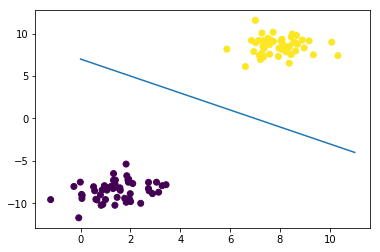

In [31]:
x = np.linspace(0,11,10) #Points along X axis
y = -x + 7 #Points along Y exis
plt.scatter(Features[:,0],Features[:,1], c=labels)
plt.plot(x,y)

# Examples (Manually with equation)

In [38]:
#if we choose a point in (8,10) and perform the equation in matrix form
np.round(1/(1+np.exp(-np.array([1, 1]).dot(np.array([[8],[10]])) - 7)))

array([1.])

In [39]:
#if we choose a point in (2,-10) and perform the equation in matrix form
np.round(1/(1+np.exp(-np.array([1, 1]).dot(np.array([[2],[-10]])) - 7)))

array([0.])

# Examples (Using Graph and session)

In [55]:
#Define the Graph
C = TheGraph()
C.Default()
#Define placeholders, variables and operations
x = Theplaceholder()
w = TheVariable([1,1])
b = TheVariable(-7)
z = add(multiplyM(w,x),b)
a = Sigmoid_Activation(z)
#Define the session
Sess = TheSession()
Class_8_10 =np.round(Sess.run(operation = a, Placeholder_dict = {x:[8,10]}))
print("Classification of (8,10) is %d, yellow points" %(Class_8_10))
Class_2_m10 = np.round(Sess.run(operation = a, Placeholder_dict = {x:[2,-10]}))
print("Classification of (2,-10) is %d, purple points" %(Class_2_m10))

Classification of (8,10) is 1, yellow points
Classification of (2,-10) is 0, purple points
